In [23]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix # чз матрицу

from catboost import CatBoostClassifier, Pool


In [25]:
X, y = make_classification(n_samples=100500, n_features=50, n_informative=25, n_redundant=0, n_clusters_per_class=6, 
                           weights=(0.9,), random_state=42, hypercube=False, class_sep=0.85)
print(X.shape)
print(y.sum())

(100500, 50)
10441


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)

In [28]:
train_pool = Pool(X_train, y_train)
valid_pool = Pool(X_valid, y_valid)
test_pool = Pool(X_test, y_test)

In [29]:
param = {
    'loss_function': 'Logloss',
    'eval_metric': 'AUC:hints=skip_train~false',
    'learning_rate': 0.1,
    'depth': 5
}

model = CatBoostClassifier(**param )
model.fit(train_pool, eval_set=valid_pool, verbose=100, early_stopping_rounds=500)

0:	learn: 0.5156342	test: 0.5004827	best: 0.5004827 (0)	total: 44.9ms	remaining: 44.9s
100:	learn: 0.8456632	test: 0.8170010	best: 0.8170010 (100)	total: 6.42s	remaining: 57.2s
200:	learn: 0.8915027	test: 0.8502630	best: 0.8502630 (200)	total: 16.2s	remaining: 1m 4s
300:	learn: 0.9141009	test: 0.8648860	best: 0.8648860 (300)	total: 22.5s	remaining: 52.3s
400:	learn: 0.9286158	test: 0.8737044	best: 0.8737229 (399)	total: 26.3s	remaining: 39.3s
500:	learn: 0.9397748	test: 0.8800621	best: 0.8800621 (500)	total: 30.1s	remaining: 29.9s
600:	learn: 0.9487900	test: 0.8843095	best: 0.8843292 (599)	total: 33.7s	remaining: 22.4s
700:	learn: 0.9560821	test: 0.8868128	best: 0.8868339 (699)	total: 37.5s	remaining: 16s
800:	learn: 0.9623105	test: 0.8897462	best: 0.8897462 (800)	total: 41.2s	remaining: 10.2s
900:	learn: 0.9674414	test: 0.8910025	best: 0.8910662 (884)	total: 44.9s	remaining: 4.93s
999:	learn: 0.9718666	test: 0.8918550	best: 0.8919352 (997)	total: 48.5s	remaining: 0us

bestTest = 0.891

In [30]:
pred_prob = model.predict_proba(X_test)
pred = model.predict(X_test)

In [31]:
auc = metrics.roc_auc_score(y_test, pred_prob[:, 1])
precision_recall_fscore = metrics.precision_recall_fscore_support(y_test, pred)
# auc - Area Under the Receiver Operating Characteristic Curve (ROC AUC) 
# from prediction scores.
# Accuracy - (TP+TN)/(TP+TN+FP+FN) 
# Precision - TP/(TP+FP) - точность
# Recall - TP/(TP+FN) - полнота
# Specificity - TN/(FP+TN) 
# Fscore - f1 score, beta=1 (default)
# support
print('auc: ' + str(auc))
print('')
print('Precision: ' + str(precision_recall_fscore[0]))
print('Recall:    ' + str(precision_recall_fscore[1]))
print('F1:        ' + str(precision_recall_fscore[2]))


auc: 0.8875233266338016

Precision: [0.91783542 0.85074627]
Recall:    [0.99528937 0.23157284]
F1:        [0.95499451 0.36405109]


In [32]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
specificity = tn / (tn+fp)
print(specificity)

0.9952893674293405


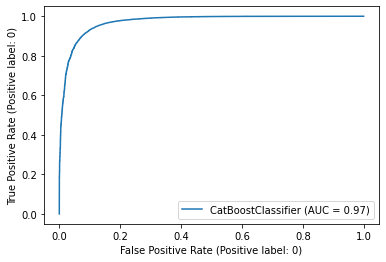

In [33]:
metrics.RocCurveDisplay.from_estimator(model, X_train, y_train, pos_label=0) # для True Positive 0

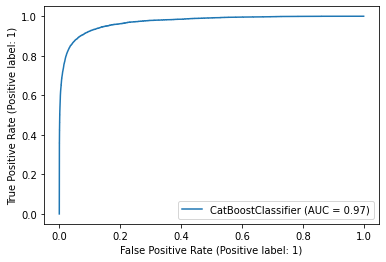

In [34]:
metrics.RocCurveDisplay.from_estimator(model, X_train, y_train)

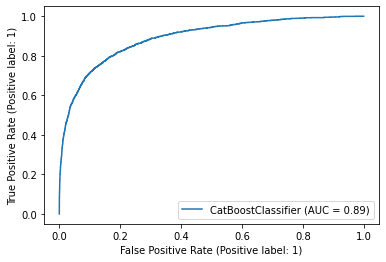

In [35]:
metrics.RocCurveDisplay.from_estimator(model, X_valid, y_valid)

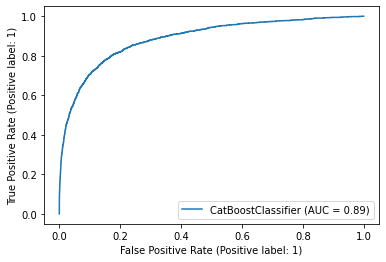

In [36]:
metrics.RocCurveDisplay.from_estimator(model, X_test, y_test)

если положительный класс существенно меньше по размеру, то AUC-ROC может давать неадекватную оценку качества работы алгоритма, поскольку измеряет долю неверно принятых объектов относительно общего числа отрицательных.

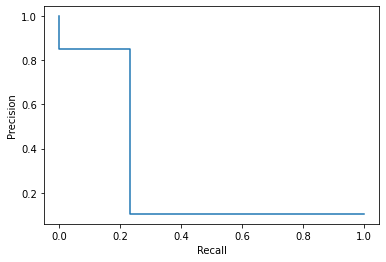

In [37]:
precision, recall, _ = metrics.precision_recall_curve(y_test, pred)
disp = metrics.PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [38]:
area = metrics.auc(recall, precision)
area

0.5810799537749809

In [39]:
param = {
    'loss_function': 'Logloss',
    'eval_metric': 'AUC:hints=skip_train~false',
    'learning_rate': 0.1,
    'depth': 4
}

model = CatBoostClassifier(**param )
model.fit(train_pool, eval_set=valid_pool, verbose=100, early_stopping_rounds=500)

0:	learn: 0.5143561	test: 0.5045111	best: 0.5045111 (0)	total: 30.8ms	remaining: 30.8s
100:	learn: 0.8135032	test: 0.7906961	best: 0.7906961 (100)	total: 3.45s	remaining: 30.7s
200:	learn: 0.8627022	test: 0.8283549	best: 0.8283549 (200)	total: 6.78s	remaining: 26.9s
300:	learn: 0.8859165	test: 0.8440827	best: 0.8440827 (300)	total: 9.96s	remaining: 23.1s
400:	learn: 0.9014750	test: 0.8549824	best: 0.8549824 (400)	total: 13.2s	remaining: 19.7s
500:	learn: 0.9135251	test: 0.8613847	best: 0.8614441 (499)	total: 18s	remaining: 17.9s
600:	learn: 0.9230773	test: 0.8653693	best: 0.8653740 (598)	total: 21.2s	remaining: 14.1s
700:	learn: 0.9306427	test: 0.8699087	best: 0.8699121 (699)	total: 24.4s	remaining: 10.4s
800:	learn: 0.9375027	test: 0.8727506	best: 0.8727506 (800)	total: 27.6s	remaining: 6.87s
900:	learn: 0.9429319	test: 0.8760362	best: 0.8760362 (900)	total: 30.9s	remaining: 3.39s
999:	learn: 0.9480991	test: 0.8776587	best: 0.8776587 (999)	total: 34s	remaining: 0us

bestTest = 0.87765

In [40]:
param = {  # в бинарном случае одно и то
    'loss_function': 'CrossEntropy',
    'eval_metric': 'AUC:hints=skip_train~false',
    'learning_rate': 0.1,
    'depth': 4
}

model = CatBoostClassifier(**param )
model.fit(train_pool, eval_set=valid_pool, verbose=100, early_stopping_rounds=500)

0:	learn: 0.5143561	test: 0.5045111	best: 0.5045111 (0)	total: 30.6ms	remaining: 30.6s
100:	learn: 0.8135032	test: 0.7906961	best: 0.7906961 (100)	total: 3.39s	remaining: 30.2s
200:	learn: 0.8627022	test: 0.8283549	best: 0.8283549 (200)	total: 6.61s	remaining: 26.3s
300:	learn: 0.8859165	test: 0.8440827	best: 0.8440827 (300)	total: 9.8s	remaining: 22.8s
400:	learn: 0.9014750	test: 0.8549824	best: 0.8549824 (400)	total: 13s	remaining: 19.4s
500:	learn: 0.9135251	test: 0.8613847	best: 0.8614441 (499)	total: 16.2s	remaining: 16.2s
600:	learn: 0.9230773	test: 0.8653693	best: 0.8653740 (598)	total: 19.4s	remaining: 12.9s
700:	learn: 0.9306427	test: 0.8699087	best: 0.8699121 (699)	total: 22.6s	remaining: 9.62s
800:	learn: 0.9375027	test: 0.8727506	best: 0.8727506 (800)	total: 25.7s	remaining: 6.39s
900:	learn: 0.9429319	test: 0.8760362	best: 0.8760362 (900)	total: 28.9s	remaining: 3.17s
999:	learn: 0.9480991	test: 0.8776587	best: 0.8776587 (999)	total: 32.4s	remaining: 0us

bestTest = 0.8776

In [54]:
param = {
    'loss_function': 'MultiClass',
    'eval_metric': 'AUC:hints=skip_train~false',
    'learning_rate': 0.1,
    'depth': 4
}

model = CatBoostClassifier(**param )
model.fit(train_pool, eval_set=valid_pool, verbose=100, early_stopping_rounds=500)

0:	learn: 0.5143190	test: 0.5054043	best: 0.5054043 (0)	total: 121ms	remaining: 2m
100:	learn: 0.8056047	test: 0.7857456	best: 0.7857456 (100)	total: 5.9s	remaining: 52.5s
200:	learn: 0.8531368	test: 0.8235551	best: 0.8235551 (200)	total: 11.1s	remaining: 44.1s
300:	learn: 0.8739417	test: 0.8367769	best: 0.8367769 (300)	total: 16s	remaining: 37.1s
400:	learn: 0.8881804	test: 0.8478634	best: 0.8478634 (400)	total: 20.8s	remaining: 31.1s
500:	learn: 0.8991881	test: 0.8548062	best: 0.8548797 (497)	total: 25.8s	remaining: 25.7s
600:	learn: 0.9085151	test: 0.8609430	best: 0.8610996 (595)	total: 30.7s	remaining: 20.4s
700:	learn: 0.9146278	test: 0.8638660	best: 0.8638660 (700)	total: 35.6s	remaining: 15.2s
800:	learn: 0.9209281	test: 0.8668560	best: 0.8668560 (800)	total: 40.5s	remaining: 10.1s
900:	learn: 0.9262446	test: 0.8705153	best: 0.8705485 (899)	total: 45.5s	remaining: 4.99s
999:	learn: 0.9311528	test: 0.8730438	best: 0.8730611 (997)	total: 53.1s	remaining: 0us

bestTest = 0.87306113

In [55]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [56]:
model3 = XGBClassifier(max_depth=4, objective='binary:logistic')
model3.fit(X_train, y_train)

XGBClassifier(max_depth=4)

In [57]:
model2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=20, learning_rate=0.1)


In [58]:
model2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.1, n_estimators=20)

In [59]:
pred_prob2 = model2.predict_proba(X_test)
auc2 = metrics.roc_auc_score(y_test, pred_prob2[:, 1])
pred_prob3 = model3.predict_proba(X_test)
auc3 = metrics.roc_auc_score(y_test, pred_prob3[:, 1])

In [60]:
print(auc, 'CatBoost')
print(auc2, 'AdaBoost')
print(auc3, 'XGBoost')

0.8875233266338016 CatBoost
0.6611728815042155 AdaBoost
0.7704222579634725 XGBoost
